# Problem Definition

I worked in a supermarket. My company wants to create an annual reports that covers all sales activity in their branches so they can increase their sales figures.

# Goals 

- To know which branch with most sales, rating, and gross income
- To know which product line has most transaction, item sold, and gross income
- To know what customer contribute the most in transaction, item sold, and gross income (Member or Non member, Male or Female)

In [1]:
#Import database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser

In [2]:
dfawal = pd.read_csv('Supermarket.csv')
dfawal

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
dfawal.set_index('Invoice ID')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


# Data preparation and cleaning

In [4]:
#karena datanya redundan, maka beberapa kolom akan didrop
df = dfawal.drop(['Branch','Time', 'cogs', 'gross margin percentage', 'Total', 'Tax 5%'], axis = 1)

In [5]:
df.isna().sum()

Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Payment          0
gross income     0
Rating           0
dtype: int64

In [6]:
df.dtypes

Invoice ID        object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Payment           object
gross income     float64
Rating           float64
dtype: object

In [8]:
#handling outliers

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
gross income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00


In [9]:
df.describe()['Unit price']

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

In [10]:
Q3 = df.describe()['Unit price']['75%']
Q1 = df.describe()['Unit price']['25%']
IQR = Q3 - Q1

In [11]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [12]:
df[(df['Unit price'] < Lower_Fence) | (df['Unit price'] > Upper_Fence)]

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,gross income,Rating


In [13]:
Q3kuantitas = df.describe()['Quantity']['75%']
Q1kuantitas = df.describe()['Quantity']['25%']
IQRkuantitas = Q3kuantitas - Q1kuantitas

In [14]:
Upper_Fencekuantitas = Q3kuantitas + (1.5 * IQR)
Lower_Fencekuantitas = Q1kuantitas - (1.5 * IQR)

In [15]:
df[(df['Unit price'] < Lower_Fencekuantitas) | (df['Unit price'] > Upper_Fencekuantitas)]

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,gross income,Rating
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,Ewallet,30.2085,5.3
5,699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,Ewallet,29.8865,4.1
15,299-46-1805,Mandalay,Member,Female,Sports and travel,93.72,6,1/15/2019,Cash,28.1160,4.5
20,300-71-4605,Naypyitaw,Member,Male,Electronic accessories,86.04,5,2/25/2019,Ewallet,21.5100,4.8
21,371-85-5789,Mandalay,Normal,Male,Health and beauty,87.98,3,3/5/2019,Ewallet,13.1970,5.1
...,...,...,...,...,...,...,...,...,...,...,...
984,189-40-5216,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,1/9/2019,Cash,33.7295,6.0
988,267-62-7380,Naypyitaw,Member,Male,Electronic accessories,82.34,10,3/29/2019,Ewallet,41.1700,4.3
991,602-16-6955,Mandalay,Normal,Female,Sports and travel,76.60,10,1/24/2019,Ewallet,38.3000,6.0
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,Ewallet,48.6900,4.4


tidak ada nilai outlier dari unit price, sedangkan terdapat 278 nilai outlier dari quantity, namun masih dalam hitungan wajar (maksimal 10) sehingga tidak perlu ada drop data.

In [16]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [17]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [20]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [21]:
#### Merubah Tipe Data Tanggal
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [22]:
df.dtypes

Invoice ID               object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Date             datetime64[ns]
Payment                  object
gross income            float64
Rating                  float64
dtype: object

In [23]:
#since date default type is object, we have to convert it to datetime so we can easily breakdown it to more details.

In [24]:
purchase_dt = df['Date'].dt

In [25]:
df['Day'] = purchase_dt.day
df['Day Name'] = purchase_dt.day_name()
df['Month'] = purchase_dt.month_name()
df['Year'] = purchase_dt.year
df['quarter'] = purchase_dt.to_period('Q')
df['yearmonth'] = purchase_dt.to_period('M')
df['yearmonth'] = df['yearmonth'].astype(str)

In [26]:
df

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,gross income,Rating,Day,Day Name,Month,Year,quarter,yearmonth
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,Ewallet,26.1415,9.1,5,Saturday,January,2019,2019Q1,2019-01
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,Cash,3.8200,9.6,8,Friday,March,2019,2019Q1,2019-03
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,Credit card,16.2155,7.4,3,Sunday,March,2019,2019Q1,2019-03
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,Ewallet,23.2880,8.4,27,Sunday,January,2019,2019Q1,2019-01
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,Ewallet,30.2085,5.3,8,Friday,February,2019,2019Q1,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,Ewallet,2.0175,6.2,29,Tuesday,January,2019,2019Q1,2019-01
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,Ewallet,48.6900,4.4,2,Saturday,March,2019,2019Q1,2019-03
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,Cash,1.5920,7.7,9,Saturday,February,2019,2019Q1,2019-02
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,Cash,3.2910,4.1,22,Friday,February,2019,2019Q1,2019-02


In [27]:
df.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Date', 'Payment', 'gross income', 'Rating',
       'Day', 'Day Name', 'Month', 'Year', 'quarter', 'yearmonth'],
      dtype='object')

## Data Analysis

In [28]:
#ada berapa kali jumlah transaksi pada setiap produk

df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [29]:


pd.crosstab(index=df['Product line'], columns='Count', margins = True)

col_0,Count,All
Product line,,
Electronic accessories,170,170
Fashion accessories,178,178
Food and beverages,174,174
Health and beauty,152,152
Home and lifestyle,160,160
Sports and travel,166,166
All,1000,1000


In [30]:
df['Quantity'].sum()

5510

In [31]:
transaksiyear = pd.crosstab(index=df['Year'], columns=[df['Product line']])
transaksiyear

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Year,,,,,,
2019,170,178,174,152,160,166


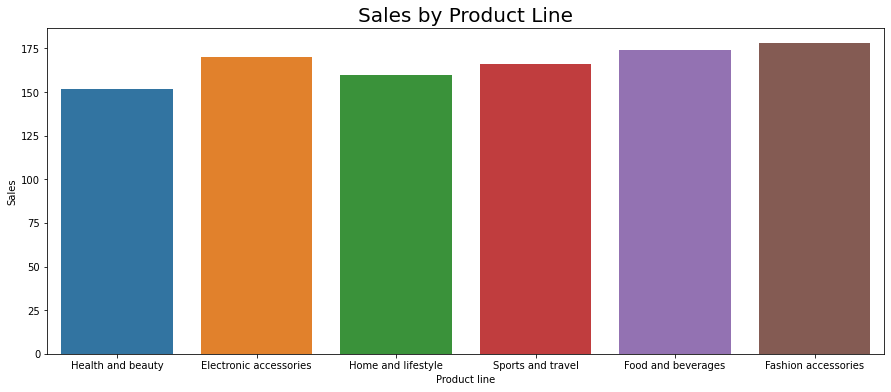

In [32]:
plt.figure(figsize=(15,6))
plt.title('Sales by Product Line',fontsize=20)
sns.countplot(x=df['Product line'])
plt.ylabel('Sales')
plt.show()

transaksi terbanyak ada pada kategori Fashion accesories dengan 178 transaksi, dan tersedikit adalah Health and beauty dengan 152 transaksi

In [33]:
transaksimonth = pd.crosstab(index=df['Month'], columns=[df['Product line']], margins = True)
transaksimonth

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,All
Month,,,,,,,
February,54,60,62,46,38,43,303
January,54,64,56,49,59,70,352
March,62,54,56,57,63,53,345
All,170,178,174,152,160,166,1000


transaksi terbanyak berada di bulan January dengan 352 transaksi, dengan kategori Fashion accesories sebagai penyumbang terbanyak dengan 64 transaksi

#### Penjualan barang terbanyak

In [34]:
#### Top Item All Sales
penjualanyear = df.pivot_table(index='Product line', values='Quantity', aggfunc='sum').reset_index()

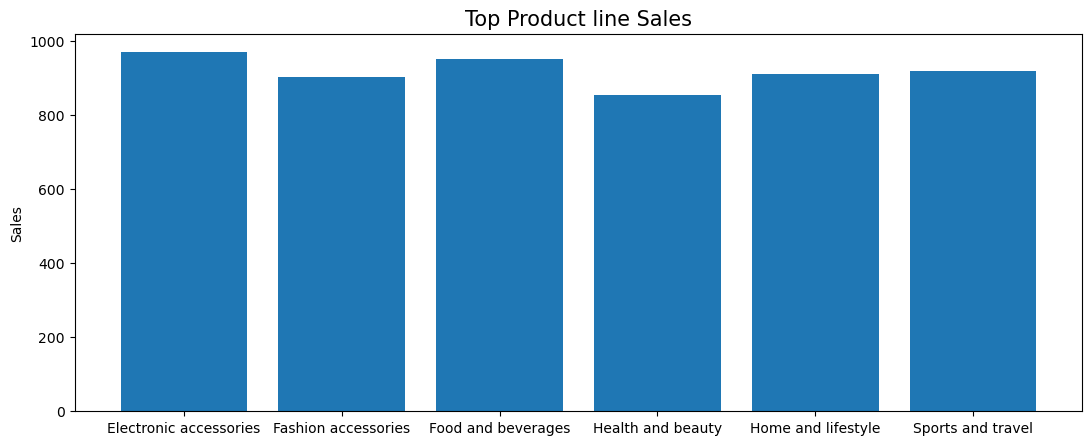

In [35]:
plt.figure(figsize=(13,5),dpi=100)
plt.bar(x=penjualanyear['Product line'], height=penjualanyear['Quantity'])
plt.title("Top Product line Sales",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(size=10)
plt.show()

In [36]:
penjualanyear.sort_values(by=['Quantity'], ascending=False)

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


Produk yang paling terbanyak terjual ada pada kategori Electronic accesories dengan 971 item, dan tersedikit adalah Health and beauty dengan 854 item

In [37]:
penjualanmonth = pd.crosstab(index=df['Month'], columns=df['Product line'], values = df['Quantity'], aggfunc = 'sum', margins = True).reset_index()
penjualanmonth

Product line,Month,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,All
0,February,313,295,349,266,205,226,1654
1,January,333,336,325,254,342,375,1965
2,March,325,271,278,334,364,319,1891
3,All,971,902,952,854,911,920,5510


Produk yang paling terbanyak terjual berada di bulan January dengan 1965 item, dengan kategori Fashion accesories sebagai penyumbang terbanyak dengan 336 item

#### Most gross income

In [38]:
#### Top Item All Sales
incomeyear = df.pivot_table(index='Product line', values='gross income', aggfunc='sum').reset_index().round(2)

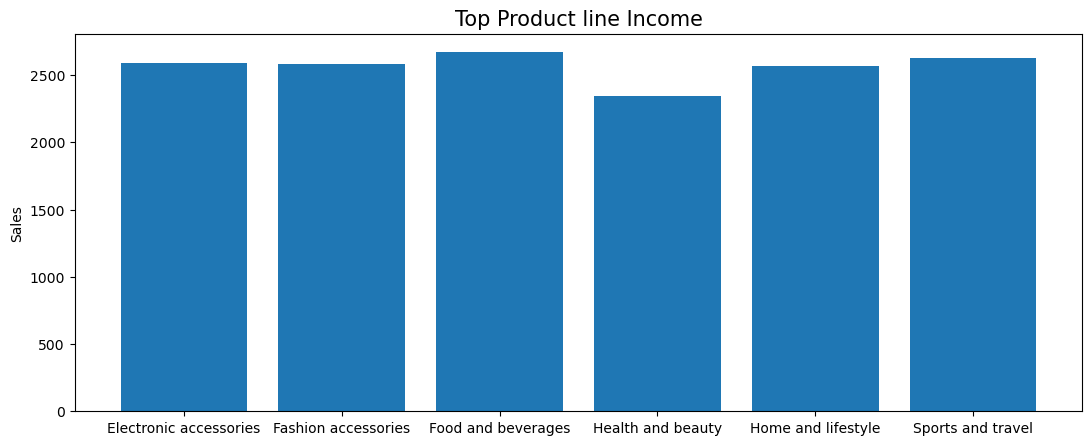

In [39]:
plt.figure(figsize=(13,5),dpi=100)
plt.bar(x=incomeyear['Product line'], height=incomeyear['gross income'])
plt.title("Top Product line Income",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(size=10)
plt.show()

In [40]:
incomeyear.sort_values(by=['gross income'], ascending=False)

,Product line,gross income
2,Food and beverages,2673.56
5,Sports and travel,2624.90
0,Electronic accessories,2587.50
1,Fashion accessories,2586.00
4,Home and lifestyle,2564.85
3,Health and beauty,2342.56


Produk yang paling menghasilkan gross income ada pada kategori Food and Beverages dengan 2673.56, dan tersedikit adalah Health and beauty dengan 2342.56

In [41]:
incomemonth = pd.crosstab(index=df['Month'], columns=df['Product line'], values = df['gross income'], aggfunc = 'sum', margins = True).reset_index()
incomemonth.round(2)

Product line,Month,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,All
0,February,826.80,905.23,952.40,695.35,592.11,657.60,4629.49
1,January,896.73,921.20,931.93,780.15,975.94,1031.76,5537.71
2,March,863.97,759.57,789.24,867.06,996.80,935.53,5212.17
3,All,2587.50,2586.00,2673.56,2342.56,2564.85,2624.90,15379.37


Bulan yang paling menghasilkan gross income terjual berada di bulan January dengan 5537.71, dengan kategori Sports and Travel sebagai penyumbang terbanyak dengan 5537.71

## Average Gross Income

In [89]:
incomeAVG  = dfawal.drop(['Branch','Time', 'cogs', 'gross margin percentage', 'Total', 'Tax 5%'], axis = 1)
totalsum = df.pivot_table(index='Product line', values='gross income', aggfunc='sum').reset_index().round(2)
totalquantity = df.pivot_table(index='Product line', values='Quantity', aggfunc='count').reset_index()

In [93]:
avgincome = incomeyear
avgincome

,Product line,gross income
0,Electronic accessories,2587.50
1,Fashion accessories,2586.00
2,Food and beverages,2673.56
3,Health and beauty,2342.56
4,Home and lifestyle,2564.85
5,Sports and travel,2624.90


In [94]:
avgincome['totalquantity'] = totalquantity['Quantity']
avgincome

,Product line,gross income,totalquantity
0,Electronic accessories,2587.50,170
1,Fashion accessories,2586.00,178
2,Food and beverages,2673.56,174
3,Health and beauty,2342.56,152
4,Home and lifestyle,2564.85,160
5,Sports and travel,2624.90,166


In [95]:
avgincome['AVG Gross Income'] = avgincome['gross income'] /avgincome['totalquantity']

In [97]:
avgincome = avgincome.pivot_table(index='Product line', values='AVG Gross Income', aggfunc='sum').reset_index()
avgincome

,Product line,AVG Gross Income
0,Electronic accessories,15.220588
1,Fashion accessories,14.528090
2,Food and beverages,15.365287
3,Health and beauty,15.411579
4,Home and lifestyle,16.030313
5,Sports and travel,15.812651


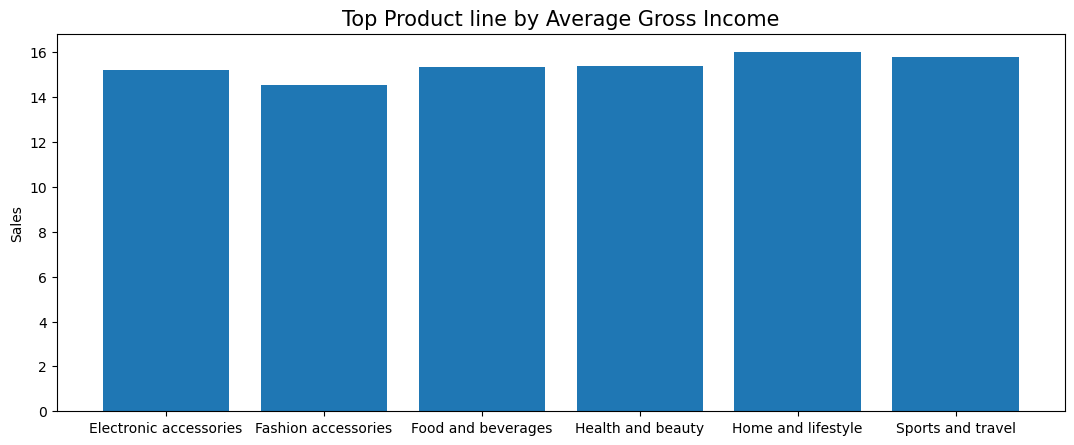

In [98]:
plt.figure(figsize=(13,5),dpi=100)
plt.bar(x=avgincome['Product line'], height=avgincome['AVG Gross Income'])
plt.title("Top Product line by Average Gross Income",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(size=10)
plt.show()

In [100]:
avgincome.sort_values(by=['AVG Gross Income'], ascending=False).round(2)

,Product line,AVG Gross Income
4,Home and lifestyle,16.03
5,Sports and travel,15.81
3,Health and beauty,15.41
2,Food and beverages,15.37
0,Electronic accessories,15.22
1,Fashion accessories,14.53


Dari rata-rata gross income, produk yang paling menguntungkan adalah produk kategori Home and lifestyle dengan nilai sebesar 16.03

## Customer Demographics

In [48]:
#### Member or Non member
member = df.pivot_table(index='Customer type', values='Quantity', aggfunc='count')
member

,Quantity
Customer type,
Member,501
Normal,499


In [49]:
gender = df.pivot_table(index='Gender', values='Quantity', aggfunc='count')
gender

,Quantity
Gender,
Female,501
Male,499


In [50]:
membergender = df[df['Customer type']=='Member'].pivot_table(index='Gender', values='Quantity', aggfunc='count')
membergender

,Quantity
Gender,
Female,261
Male,240


In [51]:
nonmembergender = df[df['Customer type']=='Normal'].pivot_table(index='Gender', values='Quantity', aggfunc='count')
nonmembergender

,Quantity
Gender,
Female,240
Male,259


Transaksi di semua cabang didominasi oleh 'Female' dengan margin rendah dengan 501 dari 1000 transaksi, dan dari segi kepesertaan transaksi juga didominasi oleh 501 dari 1000 transaksi.

Secara keseluruhan, jenis kelaminnya didominasi oleh 'Female' sebanyak 261 dari 501 anggota.

#### Customer behavior

In [52]:
df.pivot_table(index='Customer type', values='Quantity', aggfunc='sum').reset_index()

,Customer type,Quantity
0,Member,2785
1,Normal,2725


Dari sebanyak 5500 produk yang terjual, customer bertipe member lah yang paling berkontribusi dengan pembelian produk sebanyak 2785 produk.

In [53]:
df.pivot_table(index='Customer type', values='gross income', aggfunc='sum').reset_index()

,Customer type,gross income
0,Member,7820.164
1,Normal,7559.205


Untuk penghasilan gross income, customer bertipe member juga yang paling berkontribusi dengan menghasilkan gross income sebesar 7820.164

In [54]:
df[df['Customer type']=='Member'].pivot_table(index='Product line', values='gross income', aggfunc='sum').reset_index()

,Product line,gross income
0,Electronic accessories,1166.5950
1,Fashion accessories,1253.5220
2,Food and beverages,1493.2200
3,Health and beauty,1230.0495
4,Home and lifestyle,1332.2870
5,Sports and travel,1344.4905


In [55]:
df[df['Customer type']=='Normal'].pivot_table(index='Product line', values='gross income', aggfunc='sum').reset_index()

,Product line,gross income
0,Electronic accessories,1420.9065
1,Fashion accessories,1332.4730
2,Food and beverages,1180.3440
3,Health and beauty,1112.5095
4,Home and lifestyle,1232.5660
5,Sports and travel,1280.4060


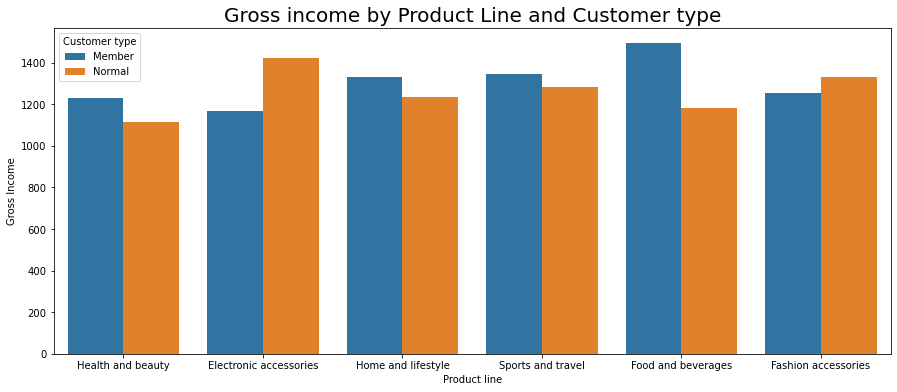

In [56]:
plt.figure(figsize=(15,6))
plt.title('Gross income by Product Line and Customer type',fontsize=20)
sns.barplot(x='Product line',y='gross income',data=df,estimator=sum,hue=df['Customer type'],ci=None)
plt.ylabel('Gross Income')
plt.show()

Dalam kontribusi gross income terlihat bahwa hampir di seluruh product, customer bertipe member yang paling banyak menghasilkan gross income, kecuali di produk kategori Electronic accesories dan Dashion accesories.

## Top Branch

In [57]:
dfbranch = pd.DataFrame(df['City'].value_counts())

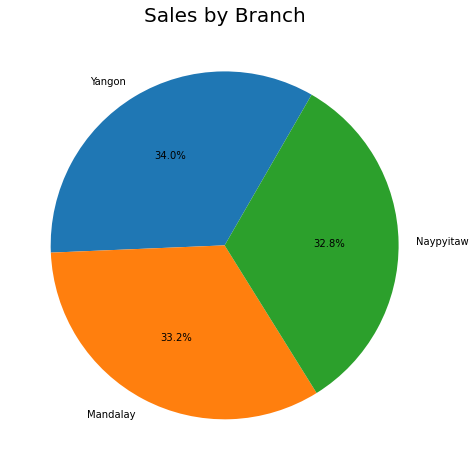

In [58]:
plt.figure(figsize=(8,8))
explore=(0.05,0.05,0.05)
df['City'].value_counts().plot.pie(autopct='%1.1f%%',
                                      startangle=60)
plt.title('Sales by Branch',fontsize=20)
plt.ylabel('')
plt.show()

In [59]:
dfbranch.sort_values(by=['City'], ascending=False)

,City
Yangon,340
Mandalay,332
Naypyitaw,328


transaksi terbanyak ada di Branch Yangon dengan jumlah transaksi sebesar 340 atau sekitar 34%, dan tersedikit ada di Branch Naypyitaw dengan 328 transaksi atau sebesar 32.8%.

In [60]:
penjualanbranch = df.pivot_table(index='City', values='Quantity', aggfunc='sum').reset_index()

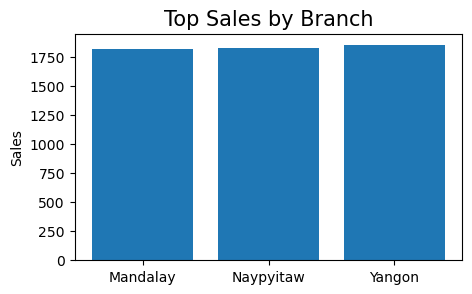

In [61]:
plt.figure(figsize=(5,3),dpi=100)
plt.bar(x=penjualanbranch['City'], height=penjualanbranch['Quantity'])
plt.title("Top Sales by Branch",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(size=10)
plt.show()

In [62]:
penjualanbranch.sort_values(by=['Quantity'], ascending=False)

,City,Quantity
2,Yangon,1859
1,Naypyitaw,1831
0,Mandalay,1820


Penjualan terbanyak ada di Branch Yangon dengan jumlah item terjual sebanyak 1859, dan tersedikit ada di Branch Mandalaw dengan 1820 transaksi.

In [63]:
incomebranch = df.pivot_table(index='City', values='gross income', aggfunc='sum').reset_index()

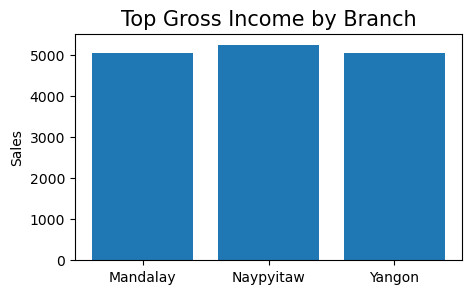

In [64]:
plt.figure(figsize=(5,3),dpi=100)
plt.bar(x=incomebranch['City'], height=incomebranch['gross income'])
plt.title("Top Gross Income by Branch",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(size=10)
plt.show()

In [65]:
(incomebranch.sort_values(by=['gross income'], ascending=False)).round(2)

,City,gross income
1,Naypyitaw,5265.18
2,Yangon,5057.16
0,Mandalay,5057.03


Branch yang paling menghasilkan gross income adalah Naypyitaw dengan 5265.18, dan tersedikit adalah Mandalay dengan 5057.03

In [66]:
#Branch Yangon memiliki jumlah transaksi dan item terjual paling banyak, tapi gross incomenya tidak jauh berbeda dengan Branch Mandalay dengan selisih sebanyak 0.13, maka perlu dibedah lebih dalam

In [67]:
(df[df['City']=='Yangon'].pivot_table(index='Product line', values='Quantity', aggfunc='sum').reset_index()).sort_values(by=['Quantity'], ascending=False)

,Product line,Quantity
4,Home and lifestyle,371
5,Sports and travel,333
0,Electronic accessories,322
2,Food and beverages,313
1,Fashion accessories,263
3,Health and beauty,257


dari seluruh produk terjual di Branch Yangon, kategori Home and lifestyle merupakan penyumbang terbanyak dengan produk terjual sebanyak 371 produk.

In [68]:
(df[df['City']=='Yangon'].pivot_table(index='Product line', values='gross income', aggfunc='sum', margins = True).reset_index()).sort_values(by=['gross income'], ascending=False)

,Product line,gross income
6,All,5057.1605
4,Home and lifestyle,1067.4855
5,Sports and travel,922.5095
0,Electronic accessories,872.2435
2,Food and beverages,817.2905
1,Fashion accessories,777.7385
3,Health and beauty,599.8930


dari seluruh produk terjual di Branch Yangon, kategori Home and lifestyle merupakan penyumbang terbanyak dengan produk terjual sebanyak 371 produk.

In [71]:
#breakdown Branch Naypyitaw sebagai penghasil gross income terbesar

In [72]:
(df[df['City']=='Naypyitaw'].pivot_table(index='Product line', values='Quantity', aggfunc='sum').reset_index()).sort_values(by=['Quantity'], ascending=False)

,Product line,Quantity
2,Food and beverages,369
1,Fashion accessories,342
0,Electronic accessories,333
3,Health and beauty,277
5,Sports and travel,265
4,Home and lifestyle,245


dari seluruh produk terjual di Branch Naypyitaw, kategori Food and beverages merupakan penyumbang terbanyak dengan produk terjual sebanyak 369 produk.

# Kesimpulan

- Yangon memiliki jumlah transaksi dan penjualan barang terbesar dibanding Branch lainnya, tapi menghasilkan gross income yang tidak jauh berbeda dengan Mandalay yang menjadi penghasil gross income paling sedikit (hanya berbeda  0.13), sebaliknya Naypitaw memiliki jumlah transaksi terkecil dibanding Branch lainnya, tapi menghasilkan gross income paling banyak
- Hal tersebut dikarenakan, walaupun Yangon memiliki jumlah transaksi dan penjualan barang terbesar dibanding Branch lainnya tapi penjualan kategori Health and Beauty menjadi penjualan paling terkecil, padahal kategori Health and Beauty memiliki nilai rata-rata gross income terbesar ketiga.
- Dalam segi membership, supermarket ini memiliki kurang lebih proporsi pembeli yang sama antara member dan non-member, dengan perbedaan yang tidak sampai 1% dari jumlah keseluruhan.
- Lebih dalam lagi, dalam penjualan produk dan penghasil gross income terbanyak, masih juga pembeli dengan tipe member yang paling banyak memberikan kontribusi.

# Solusi
    - Dengan melihat potensi di Branch Yangon dalam segi jumlah transaksi dan produk terjual, maka untuk meningkatkan gross income disarankan untuk membuat promosi di Health and beauty dengan lebih giat. Caranya bisa dengan membuat brosur atau stand banner yang memperlihatkan produk-produk di kategori Health and beauty.
    - Sedangkan di branch lain yang memiliki jumlah transaksi dan produk terjual lebih rendah, disarankan untuk membuat promo-promo diskon harga produk melalui mekanisme-mekanisme tertentu, seperti hari khusus atau diskon khusus untuk member apabila sudah mencapai tingkatan atau poin tertentu.
    - Dari segi membership, jika dilihat dari jumlah terbanyak, maka bisa dikatakan mayoritas pembeli sudah menjadi member,tetapi perbedaannya tidak signifikan. Oleh karena itu, untuk meningkatkan loyalty customer, perlu dibuat program-program promosi yang dapat meningkatkan kenaikan membership di supermarket (contoh: member dengan poin tertentu dapat mengikuti undian hadiah atau mendapatkan diskon produk).

### Simulasi Promo:
Penjualan kategori terbanyak di Branch Yangon adalah Home and lifestyle sebanyak 371 produk, sedangkan Health and beauty sebesar 257 produk.
Asumsikan setelah promo tersebut penjualan Fashion accesories meningkat menjadi sama hasilnya dengan Home and lifestyle yaitu 371 produk, maka asumsi pertambahan gross incomenya adalah sebesar (371-257 = 114 * 15.41 (rata-rata gross income health)) = 1756.74
atau menjadi kenaikan sebesar 34% dari gross income sebelumnya.